Attribute information:

     1. Class: DIE, LIVE
     
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     
     3. SEX: male, female
     
     4. STEROID: no, yes
     
     5. ANTIVIRALS: no, yes
     
     6. FATIGUE: no, yes
     
     7. MALAISE: no, yes
     
     8. ANOREXIA: no, yes
     
     9. LIVER BIG: no, yes
     
    10. LIVER FIRM: no, yes
    
    11. SPLEEN PALPABLE: no, yes
    
    12. SPIDERS: no, yes
    
    13. ASCITES: no, yes
    
    14. VARICES: no, yes
    
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
        
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    
    20. HISTOLOGY: no, yes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler


In [2]:
column_names = [
    'Class', 
    'AGE', 
    'SEX', 
    'STEROID', 
    'ANTIVIRALS', 
    'FATIGUE', 
    'MALAISE', 
    'ANOREXIA', 
    'LIVER BIG', 
    'LIVER FIRM', 
    'SPLEEN PALPABLE', 
    'SPIDERS', 
    'ASCITES', 
    'VARICES', 
    'BILIRUBIN', 
    'ALK PHOSPHATE', 
    'SGOT', 
    'ALBUMIN', 
    'PROTIME', 
    'HISTOLOGY'
]
df_hepatitis = pd.read_csv('hepatitis/hepatitis.data', header=None, names=column_names)

print(df_hepatitis.columns)
print(df_hepatitis.head(10))

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')
   Class  AGE  SEX STEROID  ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER BIG  \
0      2   30    2       1           2       2       2        2         1   
1      2   50    1       1           2       1       2        2         1   
2      2   78    1       2           2       1       2        2         2   
3      2   31    1       ?           1       2       2        2         2   
4      2   34    1       2           2       2       2        2         2   
5      2   34    1       2           2       2       2        2         2   
6      1   51    1       1           2       1       2        1         2   
7      2   23    1       2           2       2       2        2         2   
8      2   39    1    

In [3]:
print(df_hepatitis.isna().sum())

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64


# Normalizacion de Variables

## Class

In [4]:
df_hepatitis['Class'] = df_hepatitis['Class'].replace(1,0) #0 DIE
df_hepatitis['Class'] = df_hepatitis['Class'].replace(2,1) #1 Survived
df_hepatitis['Class'].value_counts()

Class
1    123
0     32
Name: count, dtype: int64

## Age

In [5]:
print(df_hepatitis['AGE'])
print(df_hepatitis['AGE'].mean())
print(df_hepatitis['AGE'].dtype)

0      30
1      50
2      78
3      31
4      34
       ..
150    46
151    44
152    61
153    53
154    43
Name: AGE, Length: 155, dtype: int64
41.2
int64


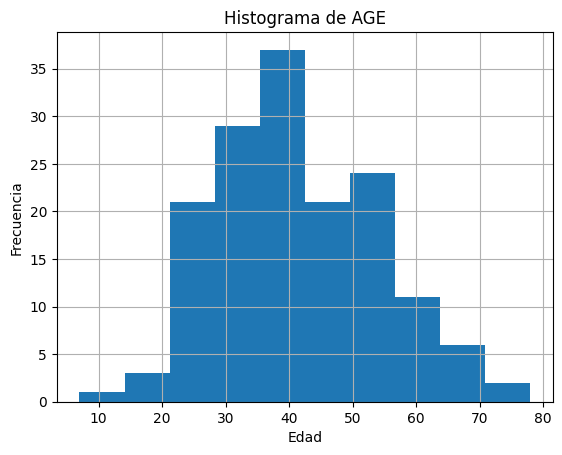

In [6]:
df_hepatitis['AGE'].hist(bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de AGE')
plt.show()

In [7]:
scaler = StandardScaler()
df_hepatitis['AGE'] = scaler.fit_transform(df_hepatitis[['AGE']])

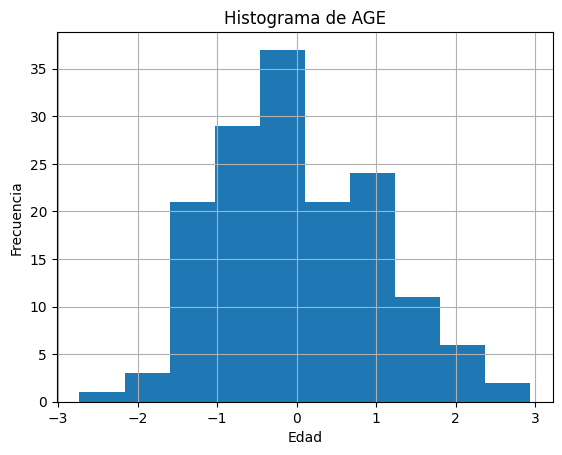

In [8]:
df_hepatitis['AGE'].hist(bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de AGE')
plt.show()

## SEX

In [9]:
print(df_hepatitis['SEX'])

0      2
1      1
2      1
3      1
4      1
      ..
150    1
151    1
152    1
153    2
154    1
Name: SEX, Length: 155, dtype: int64


In [10]:
df_hepatitis['SEX'] = df_hepatitis['SEX'].replace(1,0) #0 Male
df_hepatitis['SEX'] = df_hepatitis['SEX'].replace(2,1) #1 Female
df_hepatitis['SEX'].value_counts()

SEX
0    139
1     16
Name: count, dtype: int64

## STEROID

In [11]:
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].astype(int) # Pasamos de Object a interger

df_hepatitis['STEROID'] = df_hepatitis['STEROID'].replace(1,0) #0 NO
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].replace(2,1) #1 YES
df_hepatitis['STEROID'].value_counts()


STEROID
1    79
0    76
Name: count, dtype: int64

## FATIGUE

In [17]:
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].replace('?',1) #Reemplazamos por la moda
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].astype(int) # Pasamos de Object a interger

df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].replace(1,0) #0 NO
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].replace(2,1) #1 YES
df_hepatitis['FATIGUE'].value_counts()

FATIGUE
0    101
1     54
Name: count, dtype: int64

## MALAISE

In [20]:
df_hepatitis['MALAISE'].value_counts()

MALAISE
2    93
1    61
?     1
Name: count, dtype: int64

In [21]:
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].astype(int) # Pasamos de Object a interger

df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].replace(1,0) #0 NO
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].replace(2,1) #1 YES
df_hepatitis['MALAISE'].value_counts()

MALAISE
1    94
0    61
Name: count, dtype: int64

## ANOREXIA

In [22]:
df_hepatitis['ANOREXIA'].value_counts()

ANOREXIA
2    122
1     32
?      1
Name: count, dtype: int64

In [23]:
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].astype(int) # Pasamos de Object a interger

df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].replace(1,0) #0 NO
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].replace(2,1) #1 YES
df_hepatitis['ANOREXIA'].value_counts()

ANOREXIA
1    123
0     32
Name: count, dtype: int64

## LIVER BIG

In [24]:
df_hepatitis['LIVER BIG'].value_counts()

LIVER BIG
2    120
1     25
?     10
Name: count, dtype: int64

In [25]:
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].astype(int) # Pasamos de Object a interger

df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].replace(1,0) #0 NO
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].replace(2,1) #1 YES
df_hepatitis['LIVER BIG'].value_counts()

LIVER BIG
1    130
0     25
Name: count, dtype: int64

## LIVER FIRM

In [26]:
df_hepatitis['LIVER FIRM'].value_counts()

LIVER FIRM
2    84
1    60
?    11
Name: count, dtype: int64

In [29]:
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].astype(int) # Pasamos de Object a interger

df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].replace(1,0) #0 NO
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].replace(2,1) #1 YES
df_hepatitis['LIVER FIRM'].value_counts()

LIVER FIRM
1    95
0    60
Name: count, dtype: int64

## SPLEEN PALPABLE

In [30]:
df_hepatitis['SPLEEN PALPABLE'].value_counts()

SPLEEN PALPABLE
2    120
1     30
?      5
Name: count, dtype: int64

In [31]:
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].astype(int) # Pasamos de Object a interger

df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].replace(1,0) #0 NO
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].replace(2,1) #1 YES
df_hepatitis['SPLEEN PALPABLE'].value_counts()

SPLEEN PALPABLE
1    125
0     30
Name: count, dtype: int64

## SPIDERS

In [32]:
df_hepatitis['SPIDERS'].value_counts()

SPIDERS
2    99
1    51
?     5
Name: count, dtype: int64

In [33]:
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].astype(int) # Pasamos de Object a interger

df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].replace(1,0) #0 NO
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].replace(2,1) #1 YES
df_hepatitis['SPIDERS'].value_counts()

SPIDERS
1    104
0     51
Name: count, dtype: int64

## ASCITES

In [34]:
df_hepatitis['ASCITES'].value_counts()

ASCITES
2    130
1     20
?      5
Name: count, dtype: int64

In [35]:
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].astype(int) # Pasamos de Object a interger

df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].replace(1,0) #0 NO
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].replace(2,1) #1 YES
df_hepatitis['ASCITES'].value_counts()

ASCITES
1    135
0     20
Name: count, dtype: int64

## VARICES

In [36]:
df_hepatitis['VARICES'].value_counts()

VARICES
2    132
1     18
?      5
Name: count, dtype: int64

In [37]:
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].replace('?',2) #Reemplazamos por la moda
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].astype(int) # Pasamos de Object a interger

df_hepatitis['VARICES'] = df_hepatitis['VARICES'].replace(1,0) #0 NO
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].replace(2,1) #1 YES
df_hepatitis['VARICES'].value_counts()

VARICES
1    137
0     18
Name: count, dtype: int64

## BILIRUBIN

In [43]:
df_hepatitis['BILIRUBIN'].value_counts()

BILIRUBIN
1.00    29
0.70    23
0.90    13
0.60    10
0.80    10
1.20     8
1.50     7
?        6
1.30     6
4.60     4
2.00     4
1.60     3
2.30     3
1.70     3
0.50     2
1.40     2
0.40     2
2.80     2
3.20     2
1.90     1
3.90     1
8.00     1
4.20     1
2.90     1
1.10     1
3.50     1
2.40     1
4.80     1
3.00     1
2.50     1
4.10     1
1.80     1
0.30     1
2.20     1
7.60     1
Name: count, dtype: int64

In [53]:
df_bilirubin = df_hepatitis
df_bilirubin = df_bilirubin[df_bilirubin['BILIRUBIN'] != '?']

df_bilirubin['BILIRUBIN'] = df_bilirubin['BILIRUBIN'].astype(float) # Pasamos de Object a interger

mean_bilirubin = df_bilirubin['BILIRUBIN'].mode()
print(mean_bilirubin[0])
#df_hepatitis['BILIRUBIN'] =df_hepatitis['BILIRUBIN'].replace('?', mean_bilirubin) 

1.0


C:\Users\marco\AppData\Local\Temp\ipykernel_40484\2910914100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bilirubin['BILIRUBIN'] = df_bilirubin['BILIRUBIN'].astype(float) # Pasamos de Object a interger


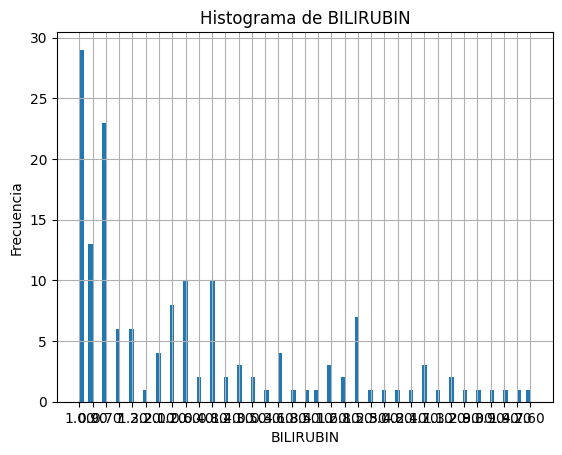

In [41]:
df_hepatitis['BILIRUBIN'].hist(bins=)
plt.xlabel('BILIRUBIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

In [ ]:
## ALK PHOSPHATE

In [ ]:
## SGOT

In [ ]:
## ALBUMIN

In [ ]:
## PROTIME

In [ ]:
## HISTOLOGY